In [46]:
import numpy
from numpy import log, array, exp, linspace, asarray, argmax, interp, append
from scipy.integrate import odeint
from scipy.stats import linregress 
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
#%matplotlib notebook

<img src="CRO410 Tut 2.2a 2021 diagram.JPG" width="700" />

The irreversible liquid phase oligomerization reaction where:

$$2A \rightarrow B$$

takes place in two adiabatic CSTR reactors operated in series (See Figure). The volumetric flow rate to the first reactor is $Q_{0} = 5~L.min^{-1}$. It contains pure $A$ at a concentration of $C_{A_{0}} = 2~mol.L^{-1}$. The inlet temperature to this first reactor is $T_{0} = 325~K$ and its volume is: $V_{1} = 150~L$. An elementary rate expression may be assumed for the reaction rate of component $A$, i.e. $r_{A} = -kC^{2}_{A}$.

Additional data is as follows:
- $k_{300K} = 6.69 \times 10^{-4}~L.mol^{-1}_{A}.min^{-1}$
- $E_{a} = 55000~J.mol^{-1} $
- $\Delta{H^{\circ}_{RX_{298}}} = -8500~J.mol^{-1}_{RX}$
- $C_{p_{A}} = 55~J.mol^{-1}.K^{-1}$
- $C_{p_{B}} = 110~J.mol^{-1}.K^{-1}$

*Note the units of $\Delta{H_{RX}}$!

The products from the first reactor are separated by appropriate processing and only the unconverted A is fed to the second reactor. You may assume the separation process to be isothermal (see the illustration). Also $\rho_{A} \approx \rho_{B}~kg.m^{-3}$.

In [47]:
V1   = 150 #L
CAo1 = 2 #mol/L
CBo1 = 0
Qo1  = 5 #L/min
FAo1 = CAo1*Qo1 #mol/min
FBo1 = CBo1*Qo1 #mol/min
To1  = 325 #K
Tref = 298 #K
R    = 8.314 #kpa.m3/(kmol.K)

In [48]:
k300      = 6.69e-4 #L/(molA.min)
Ea        = 55000 # J/mol
delHref   = -8500 #J/molrx
CpA       = 55 #J/(mol.K)
CpB       = 110 #J/(mol.K)

In [49]:
ko        = k300*exp(Ea/(R*300))
ko

2524193.567119365

Rate equations:
\begin{align}
r_{A_{1}} &= -k_{1}C^{2}_{A1_{0}}(1 - X_{1})^{2} \nonumber \\
r_{A_{2}} &= -k_{2}C^{2}_{A2_{0}}(1 - X_{2})^{2} \nonumber \\
k_{1} &= k_{0}e^{-E_{a}/RT} \nonumber \\
k_{2} &= k_{0}e^{-E_{a}/RT} \nonumber \\
r_{B_{1}} &= -0.5r_{A_{1}} \nonumber \\
r_{B_{2}} &= -0.5r_{A_{2}} \nonumber
\end{align}

Mole balance equations:
\begin{align}
F_{A1_{0}} - F_{A_{1}} + r_{A_{1}}V_{1} &= 0 \nonumber \\
F_{A1_{0}}X_{1} + r_{A_{1}}V_{1} &= 0 \nonumber \\
r_{A_{1}} &= \dfrac{-F_{A1_{0}}X_{1}}{V_{1}} \nonumber \\
-k_{0}e^{-E_{a}/RT_{1}}C^{2}_{A1_{0}}(1 - X_{1})^{2} &= \dfrac{-C_{A1_{0}}Q_{0}1X_{1}}{V_{1}} \nonumber \\
X_{1} &= \dfrac{1}{Q_{0}1} V_{1}k_{0}e^{-E_{a}/RT_{1}}C_{A1_{0}}(1 - X_{1})^{2}\nonumber \\
X_{2} &= \dfrac{1}{Q_{0}2} V_{2}k_{0}e^{-E_{a}/RT_{2}}C_{A2_{0}}(1 - X_{2})^{2}\nonumber
\end{align}

Energy Balance:
\begin{align}
T &= T_{0} + \dfrac{(-\Delta H_{RX_{j}})(F_{A_{0}}/a)}{\Sigma_{i}F_{i_{0}}C_{p_{i}}}X_{A} \nonumber \\
T_{1} &= T_{0} + \dfrac{(-\Delta H_{RX1})}{2C_{p_{A}}}X_{1} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX2})}{2C_{p_{A}}}X_{2} \quad \text{remember that pure A goes into RX2 as well}\nonumber 
\end{align}

Extra equations:
\begin{align}
C_{A_{1}} &= C_{A1_{0}}(1 - X_{1}) \nonumber \\
C_{A2_{0}} &= C_{A_{1}} \nonumber \\
C_{A_{2}} &= C_{A2_{0}}(1 - X_{2}) \nonumber \\
F_{A_{1}} &= F_{A1_{0}}(1 - X_{1}) \nonumber \\
F_{A2_{0}} &= F_{A_{1}} \nonumber \\
F_{A_{2}} &= F_{A2_{0}}(1 - X_{2}) \nonumber
\end{align}

For the conversion we have:
\begin{align}
(1 - X_{T}) &= (1 - X_{1})(1 - X_{2}) \nonumber 
\end{align}

Overall conversion:
\begin{align}
X_{T} &= \dfrac{C_{A1_{0}} - C_{A_{2}}}{C_{A1_{0}}} \nonumber \\
\end{align}

Assumption: Flow rate is constant, i.e. $Q = Q_{0_{1}}$ since the density of the mix is constant. Proof:

Mass balance:
\begin{align}
    \dot{m}_{in} &= \dot{m}_{out} \nonumber \\
    FA_{0}.MM_{A} &= FA_{0}.(1 - X_{1}).MM_{A} + \dfrac{1}{2}FA_{0}.X_{1}.MM_{B} \nonumber
\end{align}

For the volumetric flow rates:
\begin{align}
    Q_{0} &= \dfrac{FA_{0}.MM_{A}}{\rho_{A}} \nonumber \\
    Q     &= \dfrac{FA_{0}.(1 - X_{1}).MM_{A}}{\rho_{A}} + \dfrac{FA_{0}.X_{1}.MM_{B}}{2\rho_{B}} \nonumber \\
    but &\quad \rho_{A} \approx \rho_{B} \quad (given) \nonumber \\
    \therefore Q_{0} &= Q \nonumber
\end{align}

**Question a)**

Can multiple steady states be a problem in RX1? Prove your answer.

From mole balance equation:
\begin{align}
X_{1} &= \dfrac{1}{Q_{0_{1}}} V_{1}k_{0}e^{-E_{a}/RT_{1}}C_{A1_{0}}(1 - X_{1})^{2}\nonumber \\
e^{-E_{a}/RT_{1}} &= \dfrac{Q_{0_{1}}X_{1}}{V_{1}k_{0}C_{A1_{0}}(1 - X_{1})^{2}} \nonumber \\
let \quad a &= \dfrac{Q_{0_{1}}X_{1}}{V_{1}k_{0}C_{A1_{0}}(1 - X_{1})^{2}} \nonumber \\
\dfrac{-E_{a}}{RT_{1}} &= ln(a) \nonumber \\
T_{1_{mb}} &= \dfrac{-E_{a}}{Rln(a)} \nonumber
\end{align}

In [50]:
Q        = Qo1
X1span   = linspace(0.01,0.99,100)
T1eb     = To1 + (-delHref*X1span)/(2*CpA)    #energy balance
a        = (Q*X1span)/(V1*ko*CAo1*(1 - X1span)**2)
T1mb     = -Ea/(R*log(a)) 

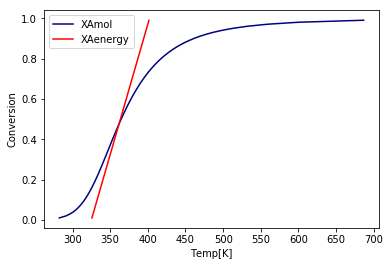

In [51]:
plt.figure(1)
plt.plot(T1mb, X1span, color='navy', label='XAmol')
plt.plot(T1eb, X1span, color='red', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
#plt.ylim(0.01,0.7)
#plt.xlim(320,400)
plt.show()

No. Looking at the above graph, the mole balance curve intersects the energy balance curve only once.

**Question b)**

What must the volume of the second reactor be if the <em>overall</em> conversion of reactant $A$ (i.e. in the two reactor system) must be $90\%$?

In [52]:
def CSTR1(var):
    X = var[0]
    T = To1 - delHref*X/(2*CpA)
    return[X - (ko*CAo1*exp(-Ea/(R*T))*((1-X)**2)*V1/(Q))]   

Xcstr1 = fsolve(CSTR1,0.91) 
X1     = Xcstr1[-1]
T1     = To1 - delHref*X1/(2*CpA)
print('Max conversion for CSTR1=', (X1*100).round(1),'%')
print('Outlet temperature for CSTR1=', (T1).round(1),'K')

Max conversion for CSTR1= 47.6 %
Outlet temperature for CSTR1= 361.8 K


In [53]:
Xtot = 0.9
X2   = 1 - (1 - Xtot)/(1 - X1)
T2   = T1 - delHref*X2/(2*CpA)
print('Max conversion for CSTR2=', (X2*100).round(1),'%')
print('Outlet temperature for CSTR2=', (T2).round(1),'K')

Max conversion for CSTR2= 80.9 %
Outlet temperature for CSTR2= 424.3 K


<img src="CRO410 Tut 2.2a 2021 diagram.JPG" width="700" />

$Q_{0}$ is given.
Mass balance around $RX_{1}$:
\begin{align}
    \dot{m}_{in} &= \dot{m}_{out} \nonumber \\
    FA_{0}.MM_{A} &= FA.MM_{A} + FB.MM_{B} \nonumber \\
    FA_{0}.MM_{A} &= FA_{0}(1 - X_{1}).MM_{A} + \dfrac{1}{2}F_{A_{0}}X_{1}.MM_{B} \nonumber    
\end{align}

Now we can calculate the volumetric flow rate into reactor 2:
\begin{align}
    \dfrac{Q_{2}}{Q_{1}} &= \dfrac{[FA_{0}.MM_{A}(1 - X_{1})]/\rho_{A}}{(FA_{0}.MM_{A})/\rho_{A}} \nonumber \\
    Q_{2} &= Q_{1}(1 - X_{1}) \nonumber
\end{align}

In [54]:
CA1  = CAo1*(1 - X1)
NA1  = CA1*Q
NA1

5.239377718790741

In [55]:
Q2 = Q*(1 - X1)
Q2

2.6196888593953704

In [56]:
CAo2 = NA1/Q2

In [57]:
CA2 = CAo2*(1 - X2)
CA2

0.38172472139718217

In [58]:
print('Max conversion for CSTR1=', (X1*100).round(1),'%')
print('Max conversion for CSTR2=', (X2*100).round(1),'%')
print('Outlet temperature for CSTR1=', (T1).round(1),'K')
print('Outlet temperature for CSTR2=', (T2).round(1),'K')
print('Volumetric flowrate from CSTR1=', (Q),'L')
print('Volumetric flowrate from CSTR2=', (Q2).round(2),'L')
print('Leftover A from CSTR1=', (CA1).round(2),'mol/L')
print('Leftover A from CSTR2=', (CA2).round(3),'mol/L')

Max conversion for CSTR1= 47.6 %
Max conversion for CSTR2= 80.9 %
Outlet temperature for CSTR1= 361.8 K
Outlet temperature for CSTR2= 424.3 K
Volumetric flowrate from CSTR1= 5 L
Volumetric flowrate from CSTR2= 2.62 L
Leftover A from CSTR1= 1.05 mol/L
Leftover A from CSTR2= 0.382 mol/L


\begin{align}
    X_{2} &= \dfrac{1}{Q_{0_{2}}} V_{2}k_{0}e^{-E_{a}/RT_{2}}C_{A2_{0}}(1 - X_{2})^{2} \nonumber \\
    V_{2} &= \dfrac{X_{2}.Q_{0_{2}}}{k_{0}e^{-E_{a}/RT_{2}}C_{A2_{0}}(1 - X_{2})^{2}} \nonumber    
\end{align}

In [59]:
d = X2*Q2
e = ko*exp(-Ea/(R*T2))*CAo2*(1 - X2)**2 
V2 = d/e
print('Volume of CSTR2 =', (V2).round(2),'L')
print('Error with memo =', (V2 - 68.03).round(2), 'L')

Volume of CSTR2 = 68.03 L
Error with memo = -0.0 L


**Question c)**

Compare the conversion of $A$ that can be achieved in an adiabatic PFR with the same volume and inlet conditions as $RX1$ (i.e. $V = 150~L$ and with $T_{0}, CA_{0}, Q_{0}$), to the conversion that can be achieved in $RX1$ (the first adiabatic CSTR). Explain the difference (or similarity) in the calculated conversions (remember a picture paints a thousand words).

Setting up equations:
Mole Balance for the PFR:
\begin{align}
\dfrac{dF_{A}}{dV} &= r_{A} \nonumber \\
-F{A_{o}}\dfrac{dX}{dV} &= -k_{i}C_{A}^{2} \nonumber \\
-QC{A_{o}}\dfrac{dX}{dV} &= -k_{i}C_{A}^{2} \nonumber \\
\dfrac{dX}{dV} &= -k_{i}\dfrac{(C_{A_{0}}(1 - X))^{2}}{-QC{A_{o}}} \nonumber \\
\dfrac{dX}{dV} &= k_{0}e^{\left(-\dfrac{E_{a}}{RT}\right)}\dfrac{C_{A_{0}}(1 - X)^{2}}{Q} \nonumber \\
\end{align}

Energy Balance is the same as for the CSTR:
\begin{align}
T_{1} &= T_{0} + \dfrac{(-\Delta H_{RX1})}{2C_{p_{A}}}X_{1} \nonumber  
\end{align}

In [60]:
V1

150

In [61]:
def PFR1(var,V):
    Xpfr = var[0]
    Tpfr = To1 - delHref*Xpfr/(2*CpA)
    dXdV = (ko*exp(-Ea/(R*Tpfr))*CAo1*(1 - Xpfr)**2)/Q
    return [dXdV]

In [62]:
Vspan2    = linspace(0, V1, 1000)
conv      = [0]
sols      = odeint(PFR1, conv, Vspan2) 

Xpfr1     = sols[:,0]
Tpfr1     = To1 - delHref*Xpfr1/(2*CpA)
print('Max conversion for PFR1=', (Xpfr1[-1]*100).round(2),'%')
print('Outlet temperature for PFR1=', (Tpfr1[-1]).round(2),'K')

Max conversion for PFR1= 31.03 %
Outlet temperature for PFR1= 348.98 K


In [63]:
Xcspan = linspace(0,0.95, 1000)
Tc = To1 - delHref*Xcspan/(2*CpA)
kc = ko*exp(-Ea/(R*Tc)) 
rAc = -kc*(CAo1*(1-Xcspan))**2
rate = -1/rAc

In [64]:
print('Max conversion for CSTR1=', (X1*100).round(2),'%')
print('Outlet temperature for CSTR1=', (T1).round(2),'K')
print('Max conversion for PFR1=', (Xpfr1[-1]*100).round(2),'%')
print('Outlet temperature for PFR1=', (Tpfr1[-1]).round(2),'K')

Max conversion for CSTR1= 47.61 %
Outlet temperature for CSTR1= 361.79 K
Max conversion for PFR1= 31.03 %
Outlet temperature for PFR1= 348.98 K


In [65]:
def PFR_func(X):
    T    = To1 - delHref*X/(2*CpA)
    k    = ko*exp(-Ea/(R*T))
    rA   = -k*(CAo1*(1 - X))**2
    rate = -1/rA
    return [rate]

In [66]:
Tx   = To1 - delHref-X1/(2*CpA)
kx   = ko*exp(-Ea/(R*T1))
rAx  = -kx*(CAo1*(1 - X1))**2
ratex= -1/rAx
ratex

31.508485895230276

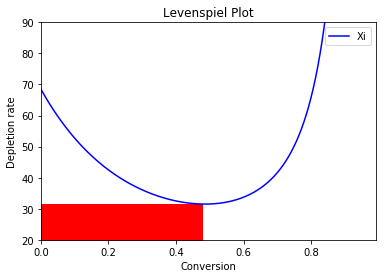

In [67]:
plt.figure(2)
plt.plot(Xcspan, rate, color='blue', label='Xi')
plt.fill_between([0, X1],[ratex,ratex], color='red')
plt.legend(loc='best')
plt.axis([0, 0.99,20,90])
plt.title('Levenspiel Plot')
plt.ylabel('Depletion rate') 
plt.xlabel('Conversion')
#plt.ylim(0,100)
#plt.xlim(0,0.5)
plt.show()

To best explain the difference between using a CSTR or PFR as the first reactor, it is easier to see it on a Levenspiel diagram. Since a CSTR conversion is at the outlet, it's volume is less, therefore more efficient than the PFR. The PFR would need more volume to achieve the same conversion as the first reactor in the system given.

--------------------------------------------------------------------------------------------

**Question d)**

<em>Design an optimal reactor “train” to achieve $90~\%$ conversion if you do NOT plan to separate unconverted A from B after the first reactor. (i.e. select reactor types operating in series, size each reactor). Separation is an EXPENSIVE process. Easy to do in a Tut problem, but a few million R in a real-life large-scale plant.</em>

Approach: The Levenspiel diagram has already been rendered. We know the most efficient train will be a CSTR followed by a PFR. The CSTR will be sized such that the conversion will be at the maximum rate (minimum on Levenspiel), followed from there by a PFR to the required 90%. The energy equation will now include product B into reactor 2.

In [68]:
MaxRate = min(rate)
MaxRate

31.494930080555843

In [69]:
i = argmax(-rate==max(-rate))
Xmin = Xcspan[i]
print('CSTR Conversion = '+str((Xmin*100).round(2))+'%')

CSTR Conversion = 48.59%


In [70]:
Xcstr  = Xmin
Td = To1 - delHref*Xcstr/(2*CpA)
kd   = ko*exp(-Ea/(R*Td))
rAcstr = -kd*CAo1**2*(1 - Xcstr)**2
rAcstr

-0.03175114208675047

In [71]:
Vcstr = Q*CAo1*Xcstr/(-rAcstr)
print('CSTR Volume = '+str(Vcstr.round(2))+' L')

CSTR Volume = 153.05 L


In [72]:
CAo2d = CAo1*(1 - Xcstr) #concentration for A into XR2
CBo2d = 0.5*CAo1*Xcstr 
print('The concentration of A into the PFR = ', (CAo2d).round(2), 'mol/L')
print('The concentration of B into the PFR = ', (CBo2d).round(2), 'mol/L')

The concentration of A into the PFR =  1.03 mol/L
The concentration of B into the PFR =  0.49 mol/L


Energy Balance for reactor 2:
\begin{align}
T &= T_{0} + \dfrac{(-\Delta H_{RX_{j}})(F_{A_{0}}/a)}{\Sigma_{i}F_{i_{0}}C_{p_{i}}}X_{A} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX_{2}}F_{A_{0_{2}}})}{2(F_{A_{0_{2}}}C_{p_{A}} + F_{B_{0_{2}}}Cp_{p_{B}})}X_{2} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX_{2}}F_{A_{0_{2}}})}{2(F_{A_{0_{2}}}C_{p_{A}} + \dfrac{1}{2}F_{A_{0_{1}}}.X_{1}C_{p_{B}})}X_{2} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX_{2}}C_{A_{0_{2}}}.Q)}{2(C_{A_{0_{2}}}.Q.C_{p_{A}} + \dfrac{1}{2}C_{A_{0_{1}}}.Q.X_{1}C_{p_{B}})}X_{2} \nonumber \\
T_{2} &= T_{1} + \dfrac{(-\Delta H_{RX_{2}}C_{A_{0_{2}}})}{2C_{A_{0_{2}}}.C_{p_{A}} + C_{A_{0_{1}}}.X_{1}.C_{p_{B}})}X_{2} \nonumber
\end{align}

In [73]:
xt = 1 - (1-0.9)/(1-Xcstr)
xt

0.8054717164833025

In [74]:
xp = (CAo2d - CAo1*(0.1))/CAo2d
xp

0.8054717164833026

For $90\%$ overall conversion:
\begin{align}
X_{pfr} &= 1  - \dfrac{1 - X_{total}}{1 - X_{cstr}} \nonumber \\
&= 1 - \dfrac{1 - 0.90}{1 - 0.49} \nonumber \\
&= 0.805472 \nonumber
\end{align}

In [75]:
def PFRd(var,V):
    Xpfr = var[0]
    Tpfr = Td - delHref*Xpfr*CAo2d/(2*CAo2d*CpA + CAo1*Xcstr*CpB)
    dXdV = (ko*exp(-Ea/(R*Tpfr))*CAo2d*(1 - Xpfr)**2)/Q
    return [dXdV]

In [76]:
Vpfr       = 233.39 #keep changing volume until X=0.805472
vspan      = linspace(0, Vpfr, 1000)
convd      = [0]
solsd      = odeint(PFRd, convd, vspan) 

Xpfrd     = solsd[:,0]
Tpfrd     = Td - delHref*Xpfrd*CAo2d/(2*CAo2d*CpA + CAo1*Xcstr*CpB)
print('Max conversion for PFR=', (Xpfrd[-1]*100).round(2),'%')
print('Outlet temperature for PFR=', (Tpfrd[-1]).round(2),'K')

Max conversion for PFR= 80.54 %
Outlet temperature for PFR= 394.54 K


In [77]:
Vtot = Vcstr + Vpfr
print('CSTR Volume = '+str(Vcstr.round(2))+' L')
print('CSTR Conversion = '+str((Xmin*100).round(2))+'%')
print('PFR Volume = '+str(Vpfr)+' L')
print('Total Volume =', (Vtot).round(2), 'L')

CSTR Volume = 153.05 L
CSTR Conversion = 48.59%
PFR Volume = 233.39 L
Total Volume = 386.44 L


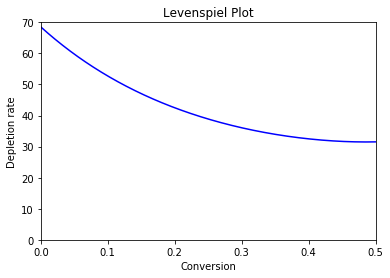

0.3102863130406267

In [78]:
x = linspace(0, Xpfr1[-1])
y = PFR_func(x)
plt.figure(3)
plt.plot(Xcspan, rate, color='blue', label='Xi')
#
#plt.fill_between([0,Xpfr1], rate, ratex, alpha=0.30)
#plt.fill_between(x, y)
#i = numpy.where(rate == rate[0])[0][0]
#j = numpy.where(Xcspan == 0)[0][0]
#plt.fill_between(Xcspan[i:j+1],rate[i:j+1], color='green')
#plt.plot(Xpfr1[-1], rate[j],"ro")
#plt.legend(loc='best')
#plt.axis([0, 0.99,20,90])
plt.title('Levenspiel Plot')
plt.ylabel('Depletion rate') 
plt.xlabel('Conversion')
plt.ylim(0,70)
plt.xlim(0,0.5)
plt.show()
Xpfr1[-1]